In [1]:
#Grafico en 3D (ya q es esp lat de 2 dimensiones) como queda la PDF
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.core.interactiveshell import InteractiveShell

np.set_printoptions(threshold=np.inf)  # Para mostrar todos los elementos de un array

B=10
data1 = np.load('D:/Autoencoders/codigo.npy')
data = data1[:,:]  # Selecciona todas las filas y las dos primeras columnas
#print(np.shape(data))
# Arma el vector de valor inicial para iterar en los mapas
min_values_col = np.min(data, axis=0)
max_values_col = np.max(data, axis=0)

# Obtener la primera fila de data

data_norm = (data - min_values_col) / (max_values_col - min_values_col)

hist1, edges = np.histogramdd(data_norm, bins=B)

histo=hist1
#pdf=hist/np.sum(hist)
#D = pdf.ndim
print(histo)

[[[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
   [ 0.  0.  0.  0.  0.  2.  0.  0.  1.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

  [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  1.  0.  1.  7.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  3.  3.  4.  0.]
   [ 0.  0.  0.  0.  2.  7.  3.  0.  0.  0.]
   [ 0.  0.  5.  0.  2. 10.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  2.  5.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

  [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
   [ 0

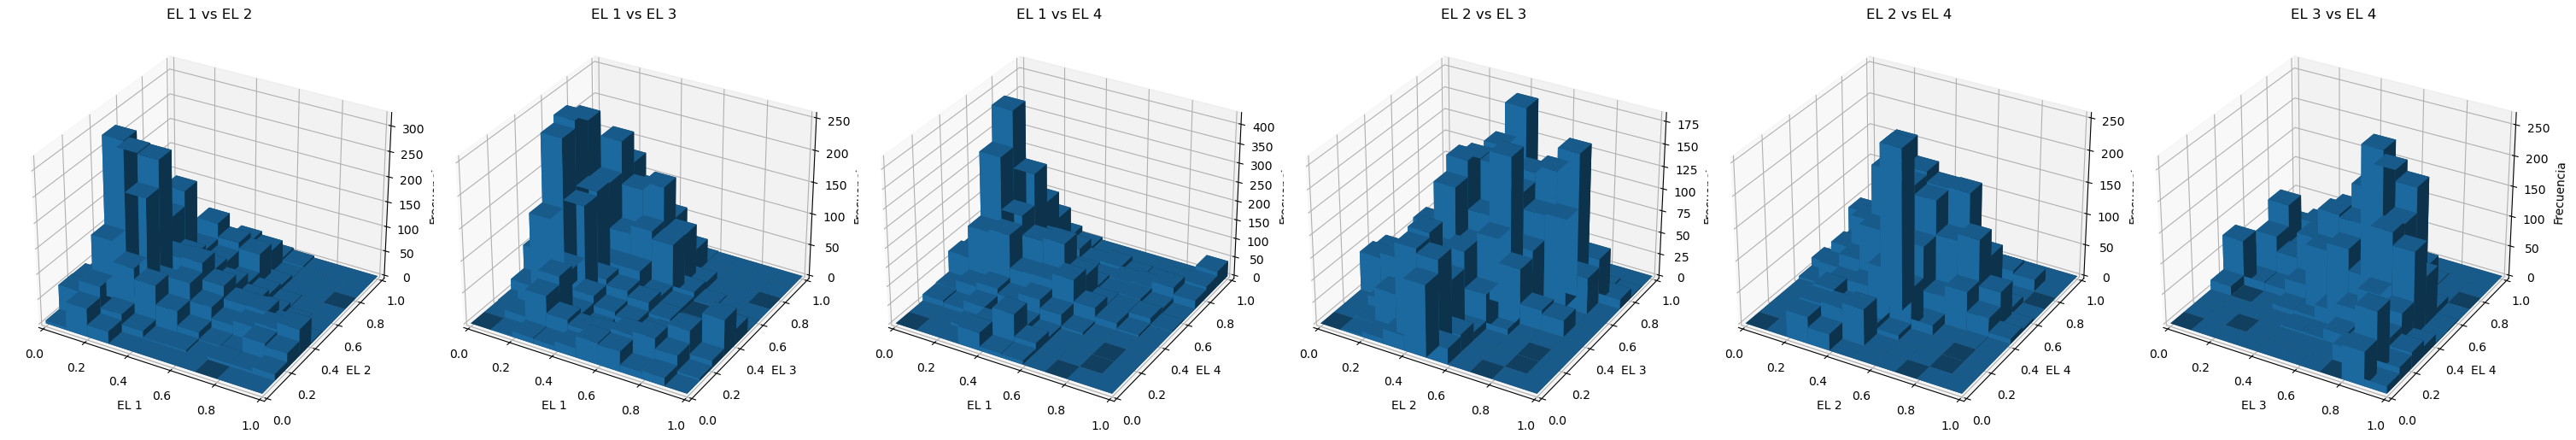

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from itertools import combinations

def plot_3d_histogram_bars(data, bins):
    num_columns = data.shape[1]
    column_pairs = list(combinations(range(num_columns), 2))
    num_pairs = len(column_pairs)

    # Calcular el tamaño de la figura
    fig = plt.figure(figsize=(5 * num_pairs, 5))

    for i, (col1, col2) in enumerate(column_pairs):
        # Calcular el histograma bidimensional
        hist, xedges, yedges = np.histogram2d(data[:, col1], data[:, col2], bins=bins, range=[[0, 1], [0, 1]])

        # Crear los bordes de los bins para el gráfico 3D
        xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
        xpos = xpos.ravel()
        ypos = ypos.ravel()
        zpos = 0

        # Altura de las barras
        dz = hist.ravel()

        # Ancho y profundidad de las barras
        dx = (xedges[1] - xedges[0]) * np.ones_like(dz)
        dy = (yedges[1] - yedges[0]) * np.ones_like(dz)

        # Crear el subgráfico 3D
        ax = fig.add_subplot(1, num_pairs, i + 1, projection='3d')
        ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

        # Configurar los títulos y etiquetas
        ax.set_title(f'EL {col1 + 1} vs EL {col2 + 1}')
        ax.set_xlabel(f'EL {col1 + 1}')
        ax.set_ylabel(f'EL {col2 + 1}')
        ax.set_zlabel('Frecuencia')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

    # Ajustar el layout para que no haya superposición
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

# Generar datos de ejemplo con valores normalizados (0 a 1)

# Llamar a la función con tus datos
plot_3d_histogram_bars(data_norm, bins=B)


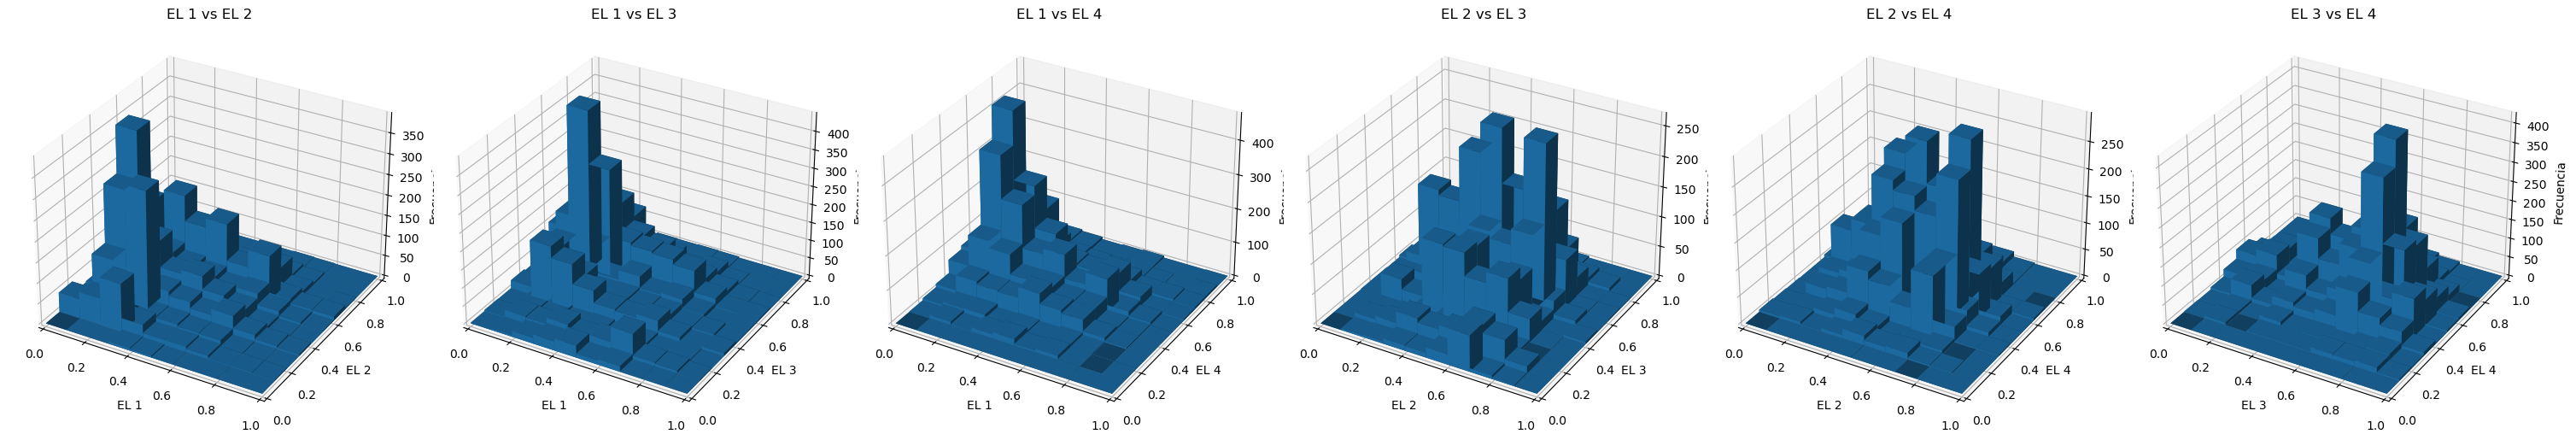

In [9]:
plot_3d_histogram_bars(xx, bins=B)

In [3]:
def matriz_A(valores_de_bin):
  D = len(valores_de_bin)
  beta = 0.9   #este valor se puede cambiar, habria q barrerlo a ver cuando da major o peor
  alfa = np.zeros(D)

  for i in range(D):
    alfa[i] = valores_de_bin[i] * beta

  alfa = alfa / np.sum(alfa)

  A = np.zeros((D, D))

  for fil in range(D):
    for col in range(D):
      A[fil, col] = alfa[fil] * 0.9
      if fil == col:
        A[fil, col] = A[fil, col] + 0.9

  A = A / np.sum(A[:, 0])
  #print(A)
  return A

In [4]:
def vector_a_decimal(vector, B):
    # Invertir el vector para que el primer elemento sea el menos significativo
    vector_invertido = vector[::-1]
    numero_decimal = 0
   # print(f"vector recibido: {vector}")
    # Convertir el vector a número decimal
    for i, digito in enumerate(vector_invertido):
        numero_decimal += digito * (B ** i)
   # print(f"digito:{vector_invertido} decimal {numero_decimal}")
    return numero_decimal

import numpy as np
#primero barro todas las xp y busco la mas densa para asignarle esa a los q no estan definidas, andara??
D = histo.ndim
shape = histo.shape

# Lista para almacenar los vectores extraídos
xp = []
# Matriz A_tot mosntruo donde guardo todas las matrices A

#s=0
# Extraer vectores para cada dimensión
for dim in range(D):
    # Iterar sobre cada índice de las dimensiones restantes
    for indices in np.ndindex(*[shape[i] for i in range(D) if i != dim]):
        # Crear un índice completo para todas las dimensiones
        full_indices = [slice(None)] * D
        remaining_indices = list(indices)
        
        # Insertar los índices de la dimensión actual
        for i, idx in enumerate(remaining_indices):
            full_indices[(dim + i + 1) % D] = idx
        
        # Extraer el sub-array manteniendo constante la dimensión actual
        sub_array1 = histo[tuple(full_indices)]
        xp.append(sub_array1)

In [5]:
xp=np.array(xp)
# Sumar los elementos de cada fila
suma_filas = np.sum(xp, axis=1)

# Encontrar el índice de la fila con la suma máxima
indice_max_suma = np.argmax(suma_filas)

# Obtener la fila con la suma máxima
fila_max_suma = xp[indice_max_suma]/np.sum(xp[indice_max_suma])
print(xp[indice_max_suma])

[ 0.  4.  3. 22. 12. 18. 42. 12.  0.  0.]


In [6]:



# Lista para almacenar los vectores extraídos
vectors = []
# Matriz A_tot mosntruo donde guardo todas las matrices A
A = []
dimen=pow(B,D-1)
A_tot = np.zeros((D,dimen, B, B))
#s=0
# Extraer vectores para cada dimensión
for dim in range(D):
    # Iterar sobre cada índice de las dimensiones restantes
    for indices in np.ndindex(*[shape[i] for i in range(D) if i != dim]):
        # Crear un índice completo para todas las dimensiones
        full_indices = [slice(None)] * D
        remaining_indices = list(indices)
        
        # Insertar los índices de la dimensión actual
        for i, idx in enumerate(remaining_indices):
            full_indices[(dim + i + 1) % D] = idx
        
        # Extraer el sub-array manteniendo constante la dimensión actual
        sub_array1 = histo[tuple(full_indices)]
        #print(f"----->{tuple(full_indices)}")
        ind=vector_a_decimal(indices, B)
        #print(f"dim: {dim} {ind} y la pdf {sub_array}")
        sub_array = sub_array1/np.sum(sub_array1)
        #esta sub_array es el xp hay que hacer una matriz A para cada una
        
        if np.all(np.isnan(sub_array)):
            sub_array = fila_max_suma
        A=matriz_A(sub_array)
            
           # print(ind)
        A_tot[dim,ind,:,:]=A
            #if np.all(np.isnan(A) | (A == 0)):
             #   print(f"todos ceros {dim} {indices} y la pdf {sub_array}")
              #  print(A)
          #  print(f"{dim} {ind} vectorcito: {sub_array} ")
            
            
        
           # A_tot[dim,ind,:,:]=0
           # print(f"***********************sub_array: {sub_array} dim: {dim} indices: {ind} indices: {indices}")
        # Verificar que el tamaño del sub-array sea B
        if sub_array.size == shape[dim]:
            vectors.append(sub_array.flatten())
            
            # Imprimir el resultado para la dimensión actual
        #    print(f"Vector para la dimensión {dim + 1} (índices {indices}):")
        #    print(sub_array)

# Verificar el número total de vectores generados
#print(f"Matriz A generada({D},{dimen},{B},{B}), correspondiente a pdfs: {len(vectors)}")
#print(np.shape(A_tot))
#print(np.shape(A_tot))



c:\Users\luciana\anaconda3\envs\python_3p7p12\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


In [7]:

def determinar_A(esel,x, B):
    #xactual=x[esel]
    #print(esel)

    #x_resto = x[:esel] + x[esel+1:]
    x_resto = np.concatenate((x[:esel], x[esel+1:]))
   # print(x_resto)
    D = len(x)
    resultados = []

    # Definir los intervalos
    intervalos = [i/B for i in range(1, B+1)]
    #print(B)
    # Procesar los elementos del 1 al D-1
    for valor in x_resto[0:D]:
        for i, limite in enumerate(intervalos):
            if valor <= limite:
                resultados.append(i)
                break
    bi=1/B       
   # print(f"esel:{esel} resultados:{x_resto} y la base:{B} y los bines 1/B: {bi}")
    resultados_final = vector_a_decimal(resultados, B)
    return resultados_final

# Ejemplo de uso
#B = 2
#x = [0.1, 0.4, 0.8]  # D=2
#resultado = determinar_A(1,x, B)
#print(resultado)  # Debería imprimir [1]
def itera_mapa(esel,A,x):
    x_actual=x[esel]
    D = A.shape[2]
    cualA = determinar_A(esel,x, D)  
    #print(f"El A es cual A({esel}, {cualA},:,:)")
    #print(A_tot[esel,cualA,:, :])
    if np.any(A_tot[esel,cualA,:, :]  != 0):
        
        Lim0 = 0
        Lim1 = 0
        x0 = 0
        y0 = 0
        x1 = 0
        y1 = 0


        for c in range(1, D+1):
             
            Lim0 = (c - 1) * (1 / D)
            Lim1 = (c - 1) * (1 / D)
            x0 = (c - 1) * (1 / D)
            y0 = 0
            x1 = (c - 1) * (1 / D)
            y1 = 0
            #print(f"ARRANCA y1: {y1}, x1: {x1}, y0:{y0}, x0:{x0}")
            for f in range(1, D+1):
                Lim1 += A_tot[esel,cualA,f - 1, c - 1] / D
                y1 += 1 / D
                x1 += A_tot[esel,cualA,f - 1, c - 1] / D
                m = (y1 - y0) / (x1 - x0)
           # print(f"tamaño de x0 {np.shape(x0)}")
                #print(f"y1: {y1}, x1: {x1}, y0:{y0}, x0:{x0}")
              #  print(f"Lim0: {Lim0}, x_actual: {x_actual}, Lim1:{Lim1}")
                if Lim0 <= x_actual< Lim1:
                    x_nw =m * (x_actual - x0) + y0
                    #print(f"x_actual: {x_actual}, x_nw: {x_nw}, m={m}")

                x0 = x1                                                                                        
                y0 = y1
                Lim0 = Lim1
    else:
        x_nw=0
        #print(f"pasa siempre por aca A_tot[{esel},{cualA},:, :] ")
    return x_nw

c:\Users\luciana\anaconda3\envs\python_3p7p12\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in double_scalars


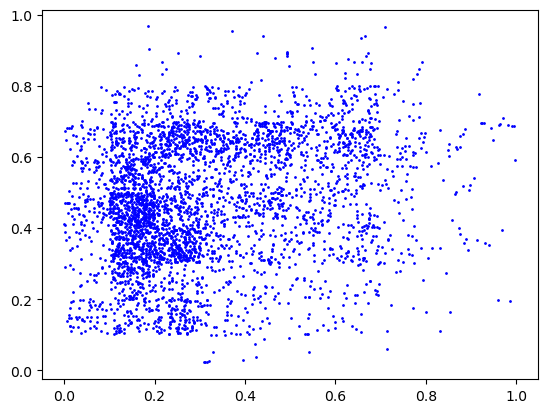

In [8]:
#itero dato AHHHHHHHHHHHHHHHHHH
# Configurar Jupyter Notebook para mostrar todas las salidas de cada celda
N=4000
#normalized_origen = [0.13598532, 0.03929693, 0.76523691, 0.07766413]
#normalized_origen = np.array(normalized_origen)
#print(normalized_origen)
x0=data_norm[222, :]
xx=[]
x=np.zeros(D)
for ii in range(N):
    for esel in range(D):
       # print(f"esel:{esel}, x0:{x0})")
        x[esel] = itera_mapa(esel, A_tot, x0)
      #  print(f"x({esel})==> {x}")
    xx.append(x.copy())  # Hacer una copia de x en cada iteración
    x0=x
    x=np.zeros(D)
# Convertir a array de NumPy para facilitar la manipulación
xx = np.array(xx)

# Graficar columna 0 vs columna 1
plt.scatter(xx[:, 0], xx[:, 1], c='blue', s=1)

[0.38811821 0.41930664 0.713825   0.17029288]


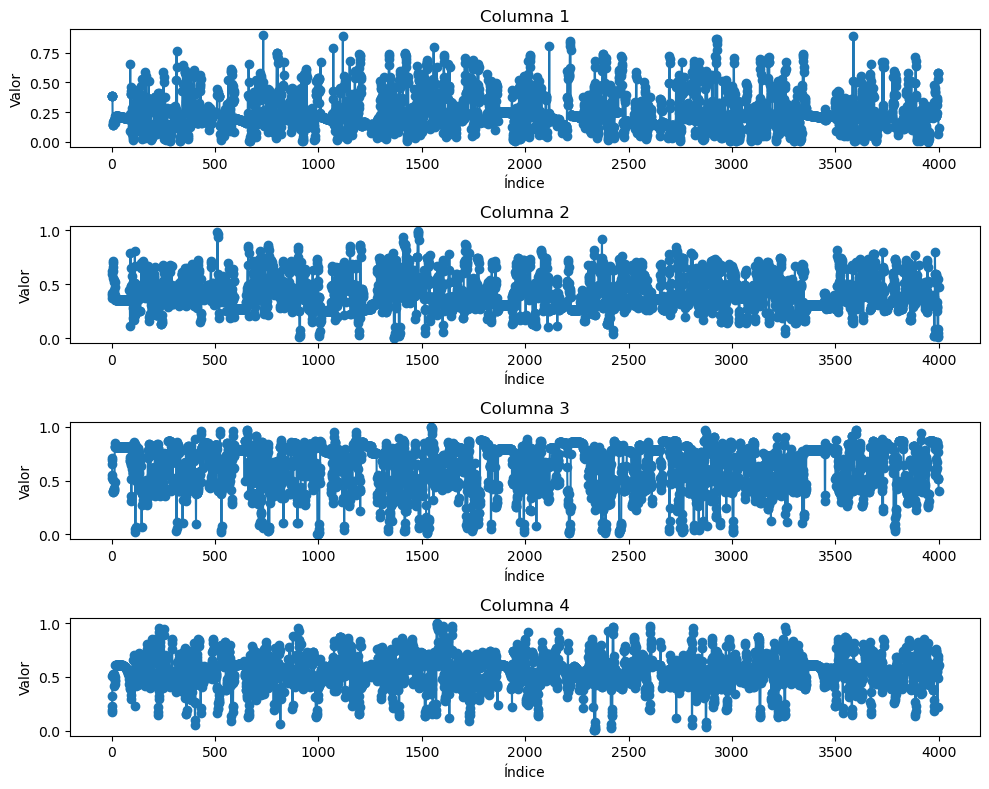

In [9]:
def plot_columns(matrix):
    num_columns = matrix.shape[1]

    # Crear una figura con un subgráfico por cada columna
    fig, axes = plt.subplots(num_columns, 1, figsize=(10, 2 * num_columns))

    for i in range(num_columns):
        axes[i].plot(matrix[:, i], marker='o', linestyle='-')
        axes[i].set_title(f'Columna {i + 1}')
        axes[i].set_xlabel('Índice')
        axes[i].set_ylabel('Valor')

    # Ajustar el layout para evitar superposición
    plt.tight_layout()
    plt.show()
print(xx[0,:])
# Llamar a la función para graficar las columnas de xx
plot_columns(xx)


In [10]:
np.savetxt('EL_ficticio.txt', xx)

In [23]:
# Lista para almacenar los valores de dim que cumplen la condición
dim_no_cero = []

# Bucle para recorrer dim de 0 a 999
for dim in range(1000):
    if np.any(A_tot[2, dim, :, :] != 0):
        dim_no_cero.append(dim)

# Mostrar los valores de dim que cumplen la condición
print("Valores de dim donde A_tot[2, dim, :, :] tiene al menos un elemento distinto de cero:")
print(dim_no_cero)

IndexError: index 9 is out of bounds for axis 1 with size 9

IndexError: index 3 is out of bounds for axis 1 with size 3

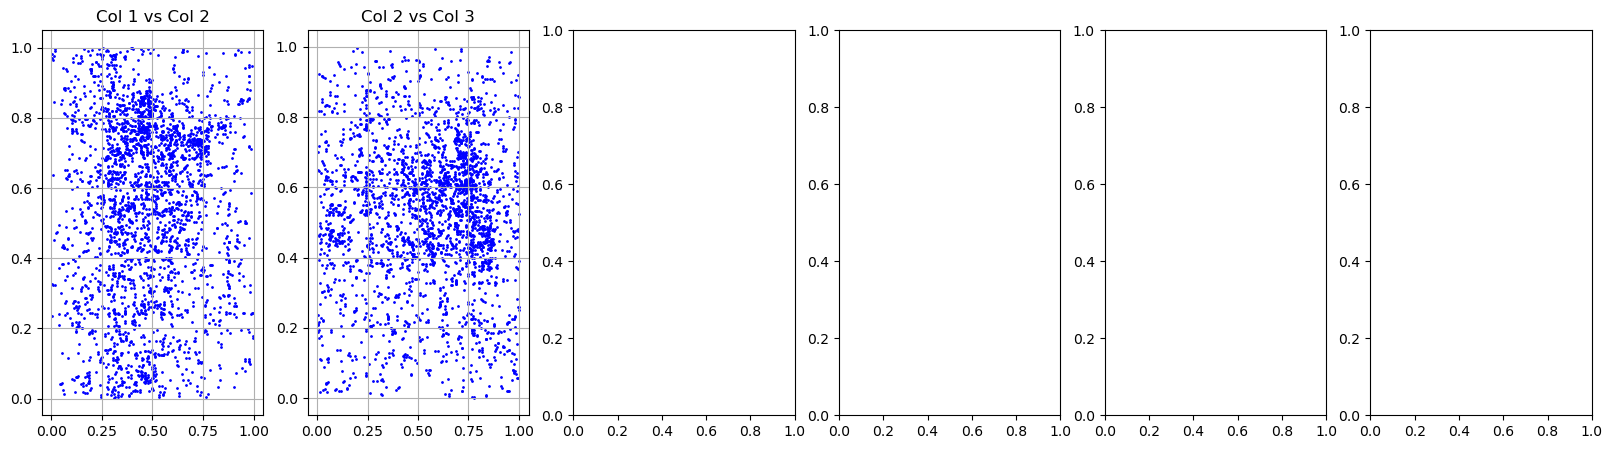

In [12]:
codigo=xx
fig1, (ax0,ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,6, figsize=(20,5))

ax0.scatter(codigo[:, 0], codigo[:, 1], c='blue', s=1)
ax0.set_title('Col 1 vs Col 2')
ax0.grid(True)

ax1.scatter(codigo[:, 1], codigo[:, 2], c='blue', s=1)
ax1.set_title('Col 2 vs Col 3')
ax1.grid(True)

ax2.scatter(codigo[:, 2], codigo[:, 3], c='blue', s=1)
ax2.set_title('Col 3 vs Col 4')
ax2.grid(True)

ax3.scatter(codigo[:, 0], codigo[:, 2], c='blue', s=1)
ax3.set_title('Col 1 vs Col 3')
ax3.grid(True)

ax4.scatter(codigo[:, 0], codigo[:, 3], c='blue', s=1)
ax4.set_title('Col1 vs Col 4')
ax4.grid(True)

ax5.scatter(codigo[:, 1], codigo[:, 2], c='blue', s=1)
ax5.set_title('Col 2 vs Col 4')
ax5.grid(True)
plt.show()

In [25]:
N_tran = 1000  #cuantos datos voy a descartar
x = np.zeros((N_tran+1))   #en x voy a guardar la salida del mapa
y = np.zeros((N_tran+1))   #en x voy a guardar la salida del mapa
x[0] = 0.013
print(x[0])  #solo para verificar que le estoy asignando un valor inicial dentro del rango 0 - 1
EL1=itera_mapa(N_tran,A,x)
y[0] = 0.223
print(y[0])  #solo para verificar que le estoy asignando un valor inicial dentro del rango 0 - 1
EL2=itera_mapa(N_tran,A,y)

0.013


IndexError: tuple index out of range

In [26]:
# Crear los histogramas
n_bins = 20
hist1, bins1 = np.histogram(EL1, bins=n_bins, density=True)
hist2, bins2 = np.histogram(EL2, bins=n_bins, density=True)

# Crear el gráfico
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histograma del vector EL1
axs[0].bar(bins1[:-1], hist1, width=(bins1[1] - bins1[0]), edgecolor='black', alpha=0.7)
axs[0].set_title('Histograma de EL1')
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Densidad')

# Histograma del vector EL2
axs[1].bar(bins2[:-1], hist2, width=(bins2[1] - bins2[0]), edgecolor='black', alpha=0.7)
axs[1].set_title('Histograma de EL2')
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Densidad')

plt.tight_layout()
plt.show()

NameError: name 'EL1' is not defined

In [22]:
#La fórmula general para reescalar un valor  x en un rango [𝑎,𝑏] a un nuevo rango [𝑐,𝑑] es:
# y=c+ (x−a)⋅(d−c)/(b-a)  si a=0 y b=1   y=c+ x⋅(d−c)

print(min_values_col)
print(max_values_col)


dx = EL1      # A[0:N-2]
dy= EL2      # A[1:N-1]

x1=min_values_col[0]+dx*(max_values_col[0]-min_values_col[0])
x2=min_values_col[1]+dy*(max_values_col[1]-min_values_col[1]) 

fig1, (ax0,ax1) = plt.subplots(1,2, figsize=(20,5))

ax0.scatter(x1,x2, c='blue', s=1)
ax0.set_title('mapa')
ax0.grid(True)


ax1.scatter(data[:, 0], data[:, 1], c='blue', s=1)
ax1.set_title('Originales')
ax1.grid(True)


[-2317.7488 -8378.411  -8614.657 ]
[9223.536  6005.4214 5945.841 ]


NameError: name 'EL1' is not defined

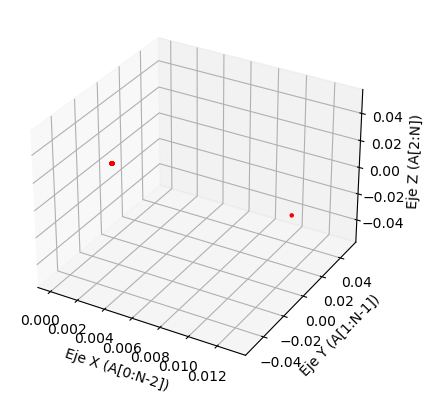

In [27]:
# Definir las variables para los ejes
dx = x[:len(x)-2]        # A[0:N-2]
dy= x[1:len(x)-1]       # A[1:N-1]
dz = x[2:]               # A[2:N]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos
ax.scatter(dx, dy, dz, c='r', marker='.')

# Etiquetas de los ejes
ax.set_xlabel('Eje X (A[0:N-2])')
ax.set_ylabel('Eje Y (A[1:N-1])')
ax.set_zlabel('Eje Z (A[2:N])')

# Mostrar el gráfico
plt.show()

In [32]:
print(np.shape(dx))
print(np.shape(dy))
print(np.shape(dz))

(23,)
(499,)
(499,)
